In [115]:
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('../')

import warnings
warnings.filterwarnings('ignore')

In [116]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

print(f'train shape => {train.shape}')
print(f'test shape => {test.shape}')

train shape => (7613, 5)
test shape => (3263, 4)


In [117]:
train.sample(5)

,id,keyword,location,text,target
2914,4183,drown,NaN,This weekend is me and Nathan's birthday weeke...,0
127,183,aftershock,marysville ca,Praise God that we have ministry that tells it...,0
6942,9955,trouble,"Washington, DC",Trouble with mental fog? Consider these tests:...,0
817,1188,blizzard,Canada,Blizzard of Auz @ 9 pm CST @RadioRiffRocks / h...,0
3914,5565,flood,New York,Spot Flood Combo 53inch 300W Curved Cree LED W...,0


In [118]:
test.sample(5)

,id,keyword,location,text
2703,9010,stretcher,SP - Brasil #1,WNBA: Stars coach Dan Hughes taken off court o...
2392,7997,razed,"New York, USA",Guess who's got a hilarious new piece on @Raze...
2591,8629,seismic,NaN,The Art World's Seismic Shift Back to the Oddb...
1680,5679,floods,NaN,Who is bringing the tornadoes and floods. Who ...
3153,10465,wild%20fires,NaN,Go home California you're drunk. Natural selec...


## Describe

In [119]:
train.describe(include=['O'])

,keyword,location,text
count,7552,5080,7613
unique,221,3341,7503
top,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...
freq,45,104,10


En *keyword* hay 7552 elementos no nulos, 221 palabras unicas donde *fatalities* es el mas repetido con 45 repeticiones.
Las otras colunmas son similares

In [120]:
test.describe(include=['O'])

,keyword,location,text
count,3237,2158,3263
unique,221,1602,3243
top,deluged,New York,11-Year-Old Boy Charged With Manslaughter of T...
freq,23,38,3


## Missing data

In [121]:
def missing_values(data: pd.DataFrame) -> pd.DataFrame:
    miss_value_percent = data.isna().sum() / data.shape[0] * 100
    return pd.DataFrame(miss_value_percent, columns=['Missing_percent']).query('Missing_percent > 0')

In [122]:
missing_values(train)

,Missing_percent
keyword,0.801261
location,33.272035


En *keyword* hay un 0.8% de valores nulos y en *location* hay un 33.27% valores nulos

In [123]:
missing_values(test)

,Missing_percent
keyword,0.796813
location,33.864542


## Distribution of the target variable

Text(0, 0.5, 'Samples')

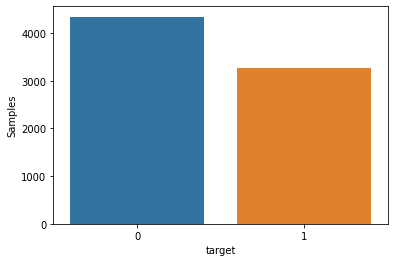

In [124]:
sns.countplot(train.target)
plt.ylabel('Samples')

## Examples tweets

In [125]:
train.query('target == 0')['text'].values[:5]

array(["What's up man?", 'I love fruits', 'Summer is lovely',
       'My car is so fast', 'What a goooooooaaaaaal!!!!!!'], dtype=object)

In [126]:
train.query('target == 1')['text'].values[:5]

array(['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
       'Forest fire near La Ronge Sask. Canada',
       "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
       '13,000 people receive #wildfires evacuation orders in California ',
       'Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school '],
      dtype=object)

## Distribution of the target variable

In [127]:
def show_values(axs, size, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.0f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center")
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.0f}'.format(p.get_height() / size * 100) 
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

In [128]:
def barplot(data, title):
    plt.figure(figsize=(10,8))
    plt.title(title)
    size = len(data)
    p = sns.barplot(y=data['location'].value_counts().index[:20], 
            x=data['location'].value_counts()[:20])       
    show_values(p, size, orient='h')

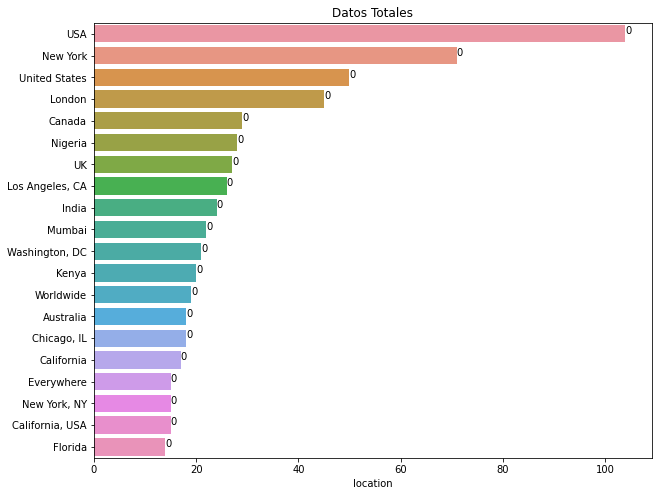

In [129]:
barplot(train, 'Datos Totales')

In [130]:
train_1 = train[train['target'] == 1]
train_0 = train[train['target'] == 1]

In [131]:
barplot(train_1)

TypeError: barplot() missing 1 required positional argument: 'title'

<AxesSubplot:xlabel='location'>

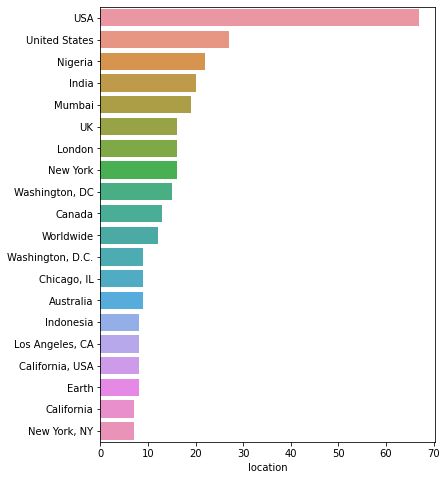

In [ ]:
plt.figure(figsize=(6,8))
sns.barplot(x=train_0['location'].value_counts()[:20],
            y=train_0['location'].value_counts().index[:20])